## Arima Exercise

In [1]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# load data
df = pd.read_csv('https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv',
                 parse_dates = ['Month'], 
                 index_col = ['Month'])\
       .rename(columns={'#Passengers':'Passengers'})

**Task:** Print the top 5 rows.

In [3]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


**Task:** Create the function called `plot_timeseries(df)`.

In [4]:
def plot_timeseries(df):
    df.plot()
    plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


**Task:** Plot the time series from above.

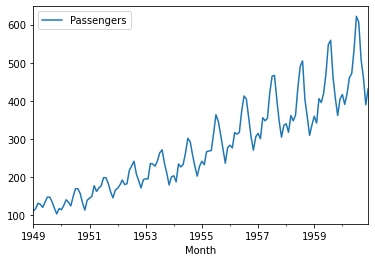

In [6]:
plot_timeseries(df)

**Task:** Compute the rolling mean and the rolling std with an appropriate window size.

In [104]:
rolling = df.rolling(window='90D')
rolling_mean = rolling.mean()

In [105]:
rolling_mean

,Passengers
Month,
1949-01-01,112.000000
1949-02-01,115.000000
1949-03-01,120.666667
1949-04-01,126.333333
1949-05-01,125.000000
...,...
1960-08-01,587.666667
1960-09-01,578.666667
1960-10-01,525.000000


In [106]:
rolling_std = rolling.std()

In [107]:
rolling_std.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  143 non-null    float64
dtypes: float64(1)
memory usage: 6.3 KB


In [108]:
rolling_std = rolling_std.fillna(method='bfill')

**Task:** Plot the two time series:
- with rolling mean 
- with rolling std

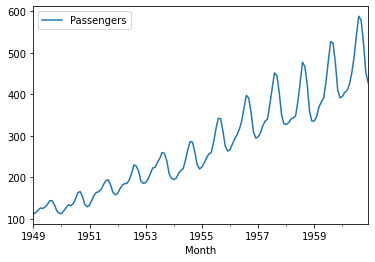

In [109]:
plot_timeseries(rolling_mean)

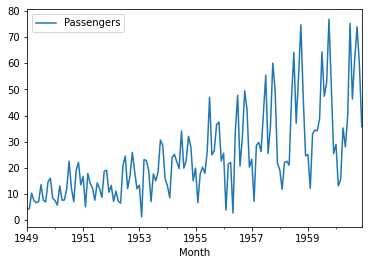

In [110]:
plot_timeseries(rolling_std)

**Task:** Test the stationarity of all the time series

In [111]:
from statsmodels.tsa.stattools import adfuller

def ADF_Stationarity_Test(timeseries, significance_level):
    result = adfuller(timeseries)
    print(result)
    if result[1] < significance_level:
        print(f'The time series is stationary with a p-value of {result[1]}')
    else:
        print(f'The time series is not stationary with a p-value of {result[1]}')

In [112]:
ADF_Stationarity_Test(rolling_mean, 0.05)

(0.8218611868300787, 0.9919809775740726, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 790.4317434648372)
The time series is not stationary with a p-value of 0.9919809775740726


**Task:** Perform a log transformation on the original time series. 

In [113]:
rolling_mean_log = np.log(rolling_mean)

**Task:** Plot the transformed time series.

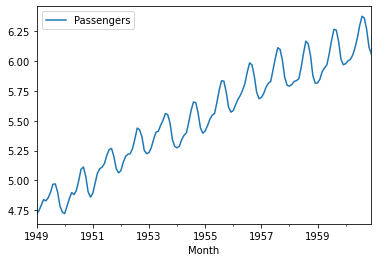

In [114]:
plot_timeseries(rolling_mean_log)

**Task:** Test the stationarity of the transformed time series. If it isn't stationary, try a different transformation technique. 

In [115]:
ADF_Stationarity_Test(rolling_mean_log, 0.05)

(-1.6697361676084772, 0.44676886946016775, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, -668.1560008008607)
The time series is not stationary with a p-value of 0.44676886946016775


In [116]:
# let's try differencing

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset.iloc[i] - dataset.iloc[i - interval]
		diff.append(value)
	return diff
 
# invert differenced forecast
def inverse_difference(last_ob, value):
	return value + last_ob

# difference the dataset
diff = difference(rolling_mean_log)

In [117]:
# unpack values
diff_list = []
for i in diff:
    diff_list.append(i[0])

In [118]:
len(diff_list)

143

In [119]:
rolling_mean_log.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  144 non-null    float64
dtypes: float64(1)
memory usage: 6.3 KB


In [120]:
stationary_log = rolling_mean
stationary_log = stationary_log.drop(index='1949-01-01', axis=1)
stationary_log['Passengers'] = diff_list

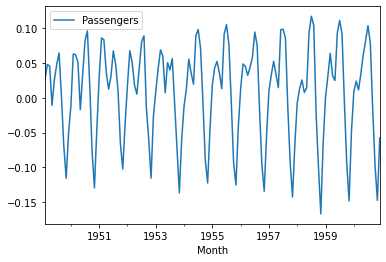

In [121]:
stationary_log.plot()
plt.show()

In [122]:
ADF_Stationarity_Test(stationary_log, 0.05)

(-2.8267173779805086, 0.054557562712505385, 12, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, -660.6226345262868)
The time series is not stationary with a p-value of 0.054557562712505385


**Task:** Use the stationary time series and find the optimal `(p, d, q)` parameters of ARIMA model.

**Task:** Plot the predictions (not transformed to the original scale).

**Task:** Plot the predictions (transformed to the original scale).

**Task:** Plot the predictions for the next 10 years. How accurate do you think your model is predicting that far in the future? 